In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import seaborn as sns

def run_regression(haplotype, phenotype):
    ind = ~phenotype.isnull() & ~haplotype.isnull()
    X = pd.DataFrame(haplotype.loc[ind])
    X.columns=['haplotype']
    X['intercept'] = 1
    Y = phenotype.loc[ind]
    logit = sm.Logit(Y, X)
    result = logit.fit()
    display(result.summary())
    
    CT = pd.crosstab(Y, X['haplotype'])
    print(CT)
    CTF = CT.div(CT.sum(axis=1), axis=0)
    return(result, CT, CTF)

def run_regression_covar(haplotype, phenotype, haplotype_colname):
    ind = ~phenotype.isnull() & (haplotype.isnull().sum(axis=1)==0)
    X = pd.DataFrame(haplotype.loc[ind, :])
    X['intercept'] = 1
    Y = phenotype.loc[ind]
    logit = sm.Logit(Y, X)
    result = logit.fit()
    display(result.summary())
    
    CT = pd.crosstab(Y, X[haplotype_colname])
    print(CT)
    CTF = CT.div(CT.sum(axis=1), axis=0)
    return(result, CT, CTF)

In [2]:
# each row is a genotyped sample, named by its IID. this table contains metadata we can use for phenotype definition
# and stratification
group_fn = 'gs://popgen-gwas/data/metadata/Annotated_GenotypedData/OmniH3Merged_PrePost2016_AggregatedLASVPhenotypes_20210829.tsv'
groups = pd.read_csv(group_fn, sep='\t')
groups.index = groups['#IID'].values
groups.head()

,#IID,SEX,Batch,SampleType,Disease,Epoch,Epoch_Bin,Country,Age,CollectionEpoch,...,Pre2016_SL_LASV_qPCR1xPos,Pre2016_SL_LASV_SeqPos,Pre2016_SL_LASV_AgPos,Pre2016_SL_LASV_AgORSeqPos,Pre2016_SL_LASV_PopControl,Pre2016_SL_LASV_IgPosPopControl,Pre2016_SL_LASV_IgNegPopControl,Pre2016_SL_LASV_IgGNegPopControl,Pre2016_SL_LASV_AgORSeqPos_DC,Pre2016_SL_LASV_AgORSeqPos_Died
WG0284565-DNA_A02_G-5231,WG0284565-DNA_A02_G-5231,2,1,SuspectedEbolaSL,Ebola,Post2016,1,1,38.0,Post2016,...,False,False,False,False,False,False,False,False,False,False
WG0284565-DNA_A03_G-5686,WG0284565-DNA_A03_G-5686,2,1,SuspectedEbolaSL,Ebola,Post2016,1,1,10.0,Post2016,...,False,False,False,False,False,False,False,False,False,False
WG0284565-DNA_A04_G-5690,WG0284565-DNA_A04_G-5690,1,1,SuspectedEbolaSL,Ebola,Post2016,1,1,16.0,Post2016,...,False,False,False,False,False,False,False,False,False,False
WG0284565-DNA_A05_G-5135,WG0284565-DNA_A05_G-5135,2,1,SuspectedEbolaSL,Ebola,Post2016,1,1,49.0,Post2016,...,False,False,False,False,False,False,False,False,False,False
WG0284565-DNA_A06_G-5045,WG0284565-DNA_A06_G-5045,2,1,SuspectedEbolaSL,Ebola,Post2016,1,1,24.0,Post2016,...,False,False,False,False,False,False,False,False,False,False


In [3]:
dedupfn = '../../data/tmp/GWAS/data/raw/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.filtBatchvars20220107.Deduped.fam'
fam = pd.read_csv(dedupfn, sep=' ', header=None)
groups = groups.loc[fam[1], :]

In [4]:
# phenotype definition
main_phenotype_data = groups[['#IID', 'SEX', 'CollectionEpoch', 'Country', 'Age']] #what we care about in definition
main_phenotype_data['Full_Batch'] = groups['Batch']
main_phenotype_data['H3'] = groups['Batch'].replace({25:0, 26:0, 50:0, 1:1, 2:1}) #batch definition 
main_phenotype_data['Omni_25A'] = main_phenotype_data['Full_Batch'].replace({25:1, 1:0, 2:0, 26:0, 50:0})
main_phenotype_data['Omni_25B'] = main_phenotype_data['Full_Batch'].replace({25:0, 1:0, 2:0, 26:1, 50:0})
main_phenotype_data['Omni_25'] = main_phenotype_data['Full_Batch'].replace({25:1, 1:0, 2:0, 26:1, 50:0})
main_phenotype_data['Epoch_Bin'] = main_phenotype_data['CollectionEpoch'].replace({'Post2016':1, 'Pre2016':0})

main_phenotype_data.head()

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,#IID,SEX,CollectionEpoch,Country,Age,Full_Batch,H3,Omni_25A,Omni_25B,Omni_25,Epoch_Bin
WG0284565-DNA_A02_G-5231,WG0284565-DNA_A02_G-5231,2,Post2016,1,38.0,1,1,0,0,0,1
WG0284565-DNA_A03_G-5686,WG0284565-DNA_A03_G-5686,2,Post2016,1,10.0,1,1,0,0,0,1
WG0284565-DNA_A04_G-5690,WG0284565-DNA_A04_G-5690,1,Post2016,1,16.0,1,1,0,0,0,1
WG0284565-DNA_A05_G-5135,WG0284565-DNA_A05_G-5135,2,Post2016,1,49.0,1,1,0,0,0,1
WG0284565-DNA_A06_G-5045,WG0284565-DNA_A06_G-5045,2,Post2016,1,24.0,1,1,0,0,0,1


In [5]:
p = 'MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl' 
cases = ['Post2016_NG_LASV_ExactLVMatchqPCR2xPosOrSeqPos', 'Pre2016_NG_LASV_qPCR1xPos', 'Pre2016_NG_LASV_SeqPos'] 

#all the cases to be merged: Nigerians across batches who are determined to be positive by qPCR or sequencing
controls = ['Pre2016_NG_LASV_PopControl', 'Post2016_NG_LASV_PopControl']
# all the controls to be merged: Nigerians across batches serving as population controls, and qPCR- samples
main_phenotype_data[p] = -1 #null
for c in cases:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 1 #1 for cases
for c in controls:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 0 #1 for controls   
print(p)
print(main_phenotype_data[p].value_counts())

MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl
-1    3316
 0    1187
 1     411
Name: MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl, dtype: int64


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
p = 'PostCases_Vs_PopControl' 
cases = ['Post2016_NG_LASV_ExactLVMatchqPCR2xPosOrSeqPos'] 

#all the cases to be merged: Nigerians across batches who are determined to be positive by qPCR or sequencing
controls = ['Pre2016_NG_LASV_PopControl', 'Post2016_NG_LASV_PopControl']
# all the controls to be merged: Nigerians across batches serving as population controls, and qPCR- samples
main_phenotype_data[p] = -1 #null
for c in cases:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 1 #1 for cases
for c in controls:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 0 #1 for controls   
print(p)
print(main_phenotype_data[p].value_counts())

PostCases_Vs_PopControl
-1    3423
 0    1187
 1     304
Name: PostCases_Vs_PopControl, dtype: int64


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [8]:
p = 'Pre2016_NG_qPCROrSeqPos_Vs_PopControl' 
cases = ['Pre2016_NG_LASV_qPCR1xPos', 'Pre2016_NG_LASV_SeqPos'] 

#all the cases to be merged: Nigerians across batches who are determined to be positive by qPCR or sequencing
controls = ['Pre2016_NG_LASV_PopControl']
# all the controls to be merged: Nigerians across batches serving as population controls, and qPCR- samples
main_phenotype_data[p] = -1 #null
for c in cases:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 1 #1 for cases
for c in controls:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 0 #1 for controls   
print(p)
print(main_phenotype_data[p].value_counts())

Pre2016_NG_qPCROrSeqPos_Vs_PopControl
-1    3646
 0    1161
 1     107
Name: Pre2016_NG_qPCROrSeqPos_Vs_PopControl, dtype: int64


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
p = 'MergeEpoch_SL_AgORSeqPos_Vs_PopControl' 

cases = ['Pre2016_SL_LASV_AgORSeqPos', 'Post2016_SL_LASV_AgPos'] 
#all the cases to be merged: SL across batches who are determined to be positive by Ag or sequencing
controls = ['Pre2016_SL_LASV_PopControl']
# all the controls to be merged: SL across batches serving as population controls

main_phenotype_data[p] = -1 #null
for c in cases:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 1 #1 for cases
for c in controls:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 0 #1 for controls   
print(p)
print(main_phenotype_data[p].value_counts())

MergeEpoch_SL_AgORSeqPos_Vs_PopControl
-1    3993
 0     799
 1     122
Name: MergeEpoch_SL_AgORSeqPos_Vs_PopControl, dtype: int64


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
p = 'Pre2016_SL_AgORSeqPos_Vs_PopControl' 

cases = ['Pre2016_SL_LASV_AgORSeqPos'] 
#all the cases to be merged: SL across batches who are determined to be positive by Ag or sequencing
controls = ['Pre2016_SL_LASV_PopControl']
# all the controls to be merged: SL across batches serving as population controls

main_phenotype_data[p] = -1 #null
for c in cases:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 1 #1 for cases
for c in controls:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 0 #1 for controls   
print(p)
print(main_phenotype_data[p].value_counts())

Pre2016_SL_AgORSeqPos_Vs_PopControl
-1    4031
 0     799
 1      84
Name: Pre2016_SL_AgORSeqPos_Vs_PopControl, dtype: int64


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
# phenotype definition

p = 'MergeEpoch_NG_Died_vs_Survived' 

cases = ['Post2016_NG_LASV_ExactLVMatchqPCR2xPosOrSeqPos_Died', 'Pre2016_NG_LASV_qPCRorSeq+_Died'] 
#all the cases to be merged: Nigerians across batches who are determined to be positive by qPCR or sequencing
controls = ['Post2016_NG_LASV_ExactLVMatchqPCR2xPosOrSeqPos_DC', 'Pre2016_NG_LASV_qPCRorSeq+_DC']
# all the controls to be merged: Nigerians across batches serving as population controls, and qPCR- samples
main_phenotype_data[p] = -1 #null
for c in cases:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 1 #1 for cases
for c in controls:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 0 #1 for controls   
print(p)
print(main_phenotype_data[p].value_counts())

MergeEpoch_NG_Died_vs_Survived
-1    4609
 0     198
 1     107
Name: MergeEpoch_NG_Died_vs_Survived, dtype: int64


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
p = 'MergeEpoch_SL_Died_vs_Survived' 

cases = ['Post2016_SL_LASV_AgPos_Died', 'Pre2016_SL_LASV_AgORSeqPos_Died'] 
controls = ['Post2016_SL_LASV_AgPos_DC', 'Pre2016_SL_LASV_AgORSeqPos_DC']
# all the controls to be merged: SL across batches serving as population controls

main_phenotype_data[p] = -1 #null
for c in cases:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 1 #1 for cases
for c in controls:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 0 #1 for controls   
print(p)
print(main_phenotype_data[p].value_counts())

MergeEpoch_SL_Died_vs_Survived
-1    4806
 1      70
 0      38
Name: MergeEpoch_SL_Died_vs_Survived, dtype: int64


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [16]:
hapfn = '../../data/tmp/LARGE/LARGE_Haplotype_KMeans2_Genotype_Calls.tsv'
hapcall = pd.read_csv(hapfn, sep='\t')
hapcall.head()

,Sample,IDV_KMeans_Clustering,Country,Array,Batch,Epoch,CollectionEpoch,Age,SampleType,sex
0,Fall2013_SM-29811,1,NG,Omni_25M_A,Fall2013,Pre2016,Pre2016,36.0,Pre2016ControlNG,1
1,Fall2013_SM-29812,0,NG,Omni_25M_A,Fall2013,Pre2016,Pre2016,29.0,Pre2016ControlNG,1
2,Fall2013_SM-29813,1,NG,Omni_25M_A,Fall2013,Pre2016,Pre2016,31.0,Pre2016ControlNG,1
3,Fall2013_SM-29817,2,NG,Omni_25M_A,Fall2013,Pre2016,Pre2016,43.0,Pre2016ControlNG,1
4,Fall2013_SM-2981D,0,NG,Omni_25M_A,Fall2013,Pre2016,Pre2016,31.0,Pre2016ControlNG,2


In [17]:
annot_merge = pd.merge( left=main_phenotype_data, right=hapcall.drop(['Country', 'Age'], axis=1), left_on='#IID', right_on='Sample', how='left')
annot_merge.head()

,#IID,SEX,CollectionEpoch_x,Country,Age,Full_Batch,H3,Omni_25A,Omni_25B,Omni_25,...,MergeEpoch_NG_SeqPos_vs_PopControl,Post2016_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl,Sample,IDV_KMeans_Clustering,Array,Batch,Epoch,CollectionEpoch_y,SampleType,sex
0,WG0284565-DNA_A02_G-5231,2,Post2016,1,38.0,1,1,0,0,0,...,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WG0284565-DNA_A03_G-5686,2,Post2016,1,10.0,1,1,0,0,0,...,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WG0284565-DNA_A04_G-5690,1,Post2016,1,16.0,1,1,0,0,0,...,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WG0284565-DNA_A05_G-5135,2,Post2016,1,49.0,1,1,0,0,0,...,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WG0284565-DNA_A06_G-5045,2,Post2016,1,24.0,1,1,0,0,0,...,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
numwithpheno = (annot_merge[['MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl','MergeEpoch_SL_AgORSeqPos_Vs_PopControl', 'MergeEpoch_NG_Died_vs_Survived', 'MergeEpoch_SL_Died_vs_Survived']]!=-1).sum(axis=1)
pd.crosstab(numwithpheno, ~annot_merge['IDV_KMeans_Clustering'].isnull())

IDV_KMeans_Clustering,False,True
row_0,,
0,2395,0
1,0,2106
2,0,413


In [19]:
annot_merge.columns

Index(['#IID', 'SEX', 'CollectionEpoch_x', 'Country', 'Age', 'Full_Batch',
       'H3', 'Omni_25A', 'Omni_25B', 'Omni_25', 'Epoch_Bin',
       'MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl',
       'PostCases_Vs_PopControl', 'PostSeqCases_Vs_PopControl',
       'Pre2016_NG_qPCROrSeqPos_Vs_PopControl',
       'Pre2016_NG_SeqPos_Vs_PopControl',
       'MergeEpoch_SL_AgORSeqPos_Vs_PopControl',
       'Pre2016_SL_AgORSeqPos_Vs_PopControl', 'MergeEpoch_NG_Died_vs_Survived',
       'MergeEpoch_SL_Died_vs_Survived', 'MergeEpoch_NG_SeqPos_vs_PopControl',
       'Post2016_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl', 'Sample',
       'IDV_KMeans_Clustering', 'Array', 'Batch', 'Epoch', 'CollectionEpoch_y',
       'SampleType', 'sex'],
      dtype='object')

## Pre-2016 NG

In [20]:
res,CT,CTF = run_regression(annot_merge['IDV_KMeans_Clustering'], annot_merge['Pre2016_NG_qPCROrSeqPos_Vs_PopControl'].replace(-1, np.nan))
print('\n\n')
display(CTF)
display(CT)

Optimization terminated successfully.
         Current function value: 0.287844
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     Logit Regression Results                                    
=================================================================================================
Dep. Variable:     Pre2016_NG_qPCROrSeqPos_Vs_PopControl   No. Observations:                 1268
Model:                                             Logit   Df Residuals:                     1266
Method:                                              MLE   Df Model:                            1
Date:                                   Sat, 30 Jul 2022   Pseudo R-squ.:                0.005204
Time:                                           16:08:53   Log-Likelihood:                -364.99
converged:                                          True   LL-Null:                       -366.90
Covariance Type:                               nonrobust   LLR p-value:                   0.05068
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
haplotype     -0.3428      0.181     -1.894      0.058      -0.698       0.012
intercept     -2.2367      0.123    -18.250      0.000      -2.477      -1.996
==============================================================================
"""

haplotype                              0.0  1.0  2.0
Pre2016_NG_qPCROrSeqPos_Vs_PopControl               
0.0                                    664  424   73
1.0                                     71   32    4





haplotype,0.0,1.0,2.0
Pre2016_NG_qPCROrSeqPos_Vs_PopControl,,,
0.0,0.571921,0.365202,0.062877
1.0,0.663551,0.299065,0.037383


haplotype,0.0,1.0,2.0
Pre2016_NG_qPCROrSeqPos_Vs_PopControl,,,
0.0,664,424,73
1.0,71,32,4


## Merge Epoch NG

In [24]:
res,CT,CTF = run_regression_covar(annot_merge[['IDV_KMeans_Clustering', 'H3']],
                                  annot_merge['MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl'].replace(-1, np.nan),
                                 'IDV_KMeans_Clustering')
print('\n\n')
display(CTF)
display(CT)

Optimization terminated successfully.
         Current function value: 0.290526
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                               Logit Regression Results                                              
=====================================================================================================================
Dep. Variable:     MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl   No. Observations:                 1598
Model:                                                                 Logit   Df Residuals:                     1595
Method:                                                                  MLE   Df Model:                            2
Date:                                                       Sat, 30 Jul 2022   Pseudo R-squ.:                  0.4904
Time:                                                               16:08:56   Log-Likelihood:                -464.26
converged:                                                              True   LL-Null:                       -911.03
Covariance Type:                                                   nonrobust   LLR p-value:                9.374e-195
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
IDV_KMeans_Clustering    -0.3060      0.150     -2.043      0.041      -0.600      -0.012
H3                        4.5004      0.196     23.003      0.000       4.117       4.884
intercept                -2.3656      0.122    -19.359      0.000      -2.605      -2.126
=========================================================================================
"""

IDV_KMeans_Clustering                               0.0  1.0  2.0
MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_...               
0.0                                                 680  431   76
1.0                                                 254  132   25





IDV_KMeans_Clustering,0.0,1.0,2.0
MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl,,,
0.0,0.572873,0.363100,0.064027
1.0,0.618005,0.321168,0.060827


IDV_KMeans_Clustering,0.0,1.0,2.0
MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl,,,
0.0,680,431,76
1.0,254,132,25


In [29]:
res,CT,CTF = run_regression(annot_merge['IDV_KMeans_Clustering'], annot_merge['PostCases_Vs_PopControl'].replace(-1, np.nan))
print('\n\n')
display(CTF)
display(CT)

Optimization terminated successfully.
         Current function value: 0.505624
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     PostCases_Vs_PopControl   No. Observations:                 1491
Model:                               Logit   Df Residuals:                     1489
Method:                                MLE   Df Model:                            1
Date:                     Sat, 30 Jul 2022   Pseudo R-squ.:               0.0002460
Time:                             16:09:11   Log-Likelihood:                -753.88
converged:                            True   LL-Null:                       -754.07
Covariance Type:                 nonrobust   LLR p-value:                    0.5425
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
haplotype     -0.0640      0.105     -0.607      0.544      -0.271       0.143
intercept     -1.3315      0.081    -16.380      0.000      -1.491      -1.172
==============================================================================
"""

haplotype                0.0  1.0  2.0
PostCases_Vs_PopControl               
0.0                      680  431   76
1.0                      183  100   21





haplotype,0.0,1.0,2.0
PostCases_Vs_PopControl,,,
0.0,0.572873,0.363100,0.064027
1.0,0.601974,0.328947,0.069079


haplotype,0.0,1.0,2.0
PostCases_Vs_PopControl,,,
0.0,680,431,76
1.0,183,100,21


## Merge epoch SL

In [34]:
res,CT,CTF = run_regression_covar(annot_merge[['IDV_KMeans_Clustering', 'H3']],
                                  annot_merge['MergeEpoch_SL_AgORSeqPos_Vs_PopControl'].replace(-1, np.nan),
                                 'IDV_KMeans_Clustering')
print('\n\n')
display(CTF)
display(CT)

Optimization terminated successfully.
         Current function value: 0.358709
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     Logit Regression Results                                     
==================================================================================================
Dep. Variable:     MergeEpoch_SL_AgORSeqPos_Vs_PopControl   No. Observations:                  921
Model:                                              Logit   Df Residuals:                      918
Method:                                               MLE   Df Model:                            2
Date:                                    Sat, 30 Jul 2022   Pseudo R-squ.:                 0.08269
Time:                                            16:09:13   Log-Likelihood:                -330.37
converged:                                           True   LL-Null:                       -360.15
Covariance Type:                                nonrobust   LLR p-value:                 1.164e-13
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
IDV_KMeans_Clustering    -0.1308      0.197     -0.665      0.506      -0.516       0.255
H3                        2.0099      0.248      8.102      0.000       1.524       2.496
intercept                -2.1515      0.130    -16.572      0.000      -2.406      -1.897
=========================================================================================
"""

IDV_KMeans_Clustering                   0.0  1.0  2.0
MergeEpoch_SL_AgORSeqPos_Vs_PopControl               
0.0                                     549  228   22
1.0                                      85   35    2





IDV_KMeans_Clustering,0.0,1.0,2.0
MergeEpoch_SL_AgORSeqPos_Vs_PopControl,,,
0.0,0.687109,0.285357,0.027534
1.0,0.696721,0.286885,0.016393


IDV_KMeans_Clustering,0.0,1.0,2.0
MergeEpoch_SL_AgORSeqPos_Vs_PopControl,,,
0.0,549,228,22
1.0,85,35,2


## Clinical outcome

In [36]:
res,CT,CTF = run_regression(annot_merge['IDV_KMeans_Clustering'], annot_merge['MergeEpoch_NG_Died_vs_Survived'].replace(-1, np.nan))
print('\n\n')
display(CTF)
display(CT)

Optimization terminated successfully.
         Current function value: 0.647348
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                 
==========================================================================================
Dep. Variable:     MergeEpoch_NG_Died_vs_Survived   No. Observations:                  305
Model:                                      Logit   Df Residuals:                      303
Method:                                       MLE   Df Model:                            1
Date:                            Sat, 30 Jul 2022   Pseudo R-squ.:               0.0009327
Time:                                    16:09:14   Log-Likelihood:                -197.44
converged:                                   True   LL-Null:                       -197.63
Covariance Type:                        nonrobust   LLR p-value:                    0.5437
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
haplotype      0.1174      0.193      0.609      0.543      -0.261       0.496
intercept     -0.6720      0.153     -4.404      0.000      -0.971      -0.373
==============================================================================
"""

haplotype                       0.0  1.0  2.0
MergeEpoch_NG_Died_vs_Survived               
0.0                             120   65   13
1.0                              60   40    7





haplotype,0.0,1.0,2.0
MergeEpoch_NG_Died_vs_Survived,,,
0.0,0.606061,0.328283,0.065657
1.0,0.560748,0.373832,0.065421


haplotype,0.0,1.0,2.0
MergeEpoch_NG_Died_vs_Survived,,,
0.0,120,65,13
1.0,60,40,7


In [38]:
res,CT,CTF = run_regression(annot_merge['IDV_KMeans_Clustering'], annot_merge['MergeEpoch_SL_Died_vs_Survived'].replace(-1, np.nan))
print('\n\n')
display(CTF)
display(CT)

Optimization terminated successfully.
         Current function value: 0.644013
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                 
==========================================================================================
Dep. Variable:     MergeEpoch_SL_Died_vs_Survived   No. Observations:                  108
Model:                                      Logit   Df Residuals:                      106
Method:                                       MLE   Df Model:                            1
Date:                            Sat, 30 Jul 2022   Pseudo R-squ.:                0.007050
Time:                                    16:09:15   Log-Likelihood:                -69.553
converged:                                   True   LL-Null:                       -70.047
Covariance Type:                        nonrobust   LLR p-value:                    0.3203
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
haplotype     -0.4110      0.412     -0.997      0.319      -1.219       0.397
intercept      0.7417      0.244      3.043      0.002       0.264       1.219
==============================================================================
"""

haplotype                       0.0  1.0  2.0
MergeEpoch_SL_Died_vs_Survived               
0.0                              24   14    0
1.0                              52   17    1





haplotype,0.0,1.0,2.0
MergeEpoch_SL_Died_vs_Survived,,,
0.0,0.631579,0.368421,0.000000
1.0,0.742857,0.242857,0.014286


haplotype,0.0,1.0,2.0
MergeEpoch_SL_Died_vs_Survived,,,
0.0,24,14,0
1.0,52,17,1


## MLMA approach

In [46]:
suscept_rel_path = '../../data/tmp/GWAS/results_20220311/{p}/rel/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.filtBatchvars20220223.deduped.{p}.maf_1e-2.hwe_1e-6.geno_5e-2.rel.withids.tsv'
outcome_rel_path = '../../data/tmp/GWAS/outcome_H3covar_20220315/{p}/rel/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.filtBatchvars20220223.deduped.{p}.maf_1e-2.hwe_1e-6.geno_5e-2.rel.withids.tsv'
dpath = {'MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl':suscept_rel_path,
         'MergeEpoch_SL_AgORSeqPos_Vs_PopControl':suscept_rel_path,
         'Pre2016_NG_qPCROrSeqPos_Vs_PopControl':suscept_rel_path,
         'Pre2016_NG_SeqPos_Vs_PopControl':suscept_rel_path,
         'Pre2016_SL_AgORSeqPos_Vs_PopControl':suscept_rel_path,
         'Post2016_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl':suscept_rel_path,
       'MergeEpoch_NG_Died_vs_Survived':outcome_rel_path,
         'MergeEpoch_SL_Died_vs_Survived':outcome_rel_path}

In [47]:
Rcmdbase = 'Rscript --vanilla ../../code/gwas_analysis/run_GMMAT_premade_model_text_dosage.R %s %s %s'

In [ ]:
ncores = 15
for p in ['MergeEpoch_NG_Died_vs_Survived', 'MergeEpoch_SL_Died_vs_Survived',
          'MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl', 'MergeEpoch_SL_AgORSeqPos_Vs_PopControl',]:
    relfn = dpath[p].format(p=p)
    rel = pd.read_csv(relfn, sep='\t', index_col=0)
    samporder = rel.index
    haploinfo = annot_merge.loc[samporder, ['IDV_KMeans_Clustering']].T
    
    
    haploinfo['SNP'] = 'Haplotype_Add'
    haploinfo['Ref'] = 'A'
    haploinfo['Alt'] = 'G'
    haploinfo = haploinfo.loc[['IDV_KMeans_Clustering'], ['SNP', 'Ref', 'Alt']+list(samporder)]
    
    nullfn = os.path.join(os.path.dirname(relfn), '../results/raw_gwas/gmmat.SEXPCsH3.{p}.nullmodel.rds').format(p=p)
    outfn =  os.path.join(os.path.dirname(relfn), '../results/LARGEHaplotype_{p}.results.tsv').format(p=p)
    haplofn = os.path.join(os.path.dirname(relfn), '../LARGEHaplotype_dosage.tsv').format(p=p)
    covarfn = os.path.join(os.path.dirname(relfn), '../Covar_Pheno_UnrelatedPCs.txt').format(p=p)

    haploinfo.to_csv(haplofn, sep='\t', index=False)
    Rcmd = Rcmdbase % (nullfn, haplofn, outfn)
    
    print(Rcmd)
    !{Rcmd}
    
    res = pd.read_csv(outfn, sep='\t')
    res.index = res['SNP']
    print(p, res.at['Haplotype_Add', 'SCORE'], res.at['Haplotype_Add', 'PVAL'])
    print('\n\n')

In [ ]:
ncores = 15
for p in ['Pre2016_NG_qPCROrSeqPos_Vs_PopControl', 'Pre2016_NG_SeqPos_Vs_PopControl', 'Pre2016_SL_AgORSeqPos_Vs_PopControl', 'Post2016_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl']:
    relfn = dpath[p].format(p=p)
    rel = pd.read_csv(relfn, sep='\t', index_col=0)
    samporder = rel.index
    haploinfo = annot_merge.loc[samporder, ['IDV_KMeans_Clustering']].T
    
    
    haploinfo['SNP'] = 'Haplotype_Add'
    haploinfo['Ref'] = 'A'
    haploinfo['Alt'] = 'G'
    haploinfo = haploinfo.loc[['IDV_KMeans_Clustering'], ['SNP', 'Ref', 'Alt']+list(samporder)]
    
    nullfn = os.path.join(os.path.dirname(relfn), '../results/raw_gwas/gmmat.SEXPCs.{p}.nullmodel.rds').format(p=p)
    outfn =  os.path.join(os.path.dirname(relfn), '../results/LARGEHaplotype_{p}.results.tsv').format(p=p)
    haplofn = os.path.join(os.path.dirname(relfn), '../LARGEHaplotype_dosage.tsv').format(p=p)
    covarfn = os.path.join(os.path.dirname(relfn), '../Covar_Pheno_UnrelatedPCs.txt').format(p=p)

    haploinfo.to_csv(haplofn, sep='\t', index=False)
    Rcmd = Rcmdbase % (nullfn, haplofn, outfn)
    
    print(Rcmd)
    !{Rcmd}
    
    res = pd.read_csv(outfn, sep='\t')
    res.index = res['SNP']
    print(p, res.at['Haplotype_Add', 'SCORE'], res.at['Haplotype_Add', 'PVAL'])
    print('\n\n')

In [50]:
suscept_rel_path = suscept_rel_path = '../../data/tmp/GWAS/results_noH3covar_20220207/{p}/rel/OmniH3Merged_PrePost2016.20210817.FiltSLOmni5.Geno_1e-1.filtBatchvars20220107.Deduped.{p}.maf_1e-2.hwe_1e-6.geno_5e-2.rel.withids.tsv'
dpath = {'MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl':suscept_rel_path,
        'MergeEpoch_SL_AgORSeqPos_Vs_PopControl':suscept_rel_path}

In [ ]:
ncores = 15
for p in ['MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl', 'MergeEpoch_SL_AgORSeqPos_Vs_PopControl',]:
    relfn = dpath[p].format(p=p)
    rel = pd.read_csv(relfn, sep='\t', index_col=0)
    samporder = rel.index
    haploinfo = annot_merge.loc[samporder, ['IDV_KMeans_Clustering']].T
    
    
    haploinfo['SNP'] = 'Haplotype_Add'
    haploinfo['Ref'] = 'A'
    haploinfo['Alt'] = 'G'
    haploinfo = haploinfo.loc[['IDV_KMeans_Clustering'], ['SNP', 'Ref', 'Alt']+list(samporder)]
    
    nullfn = os.path.join(os.path.dirname(relfn), '../results/raw_gwas/gmmat.SEXPCs.{p}.nullmodel.rds').format(p=p)
    outfn =  os.path.join(os.path.dirname(relfn), '../results/LARGEHaplotype_{p}.results.tsv').format(p=p)
    haplofn = os.path.join(os.path.dirname(relfn), '../LARGEHaplotype_dosage.tsv').format(p=p)
    covarfn = os.path.join(os.path.dirname(relfn), '../Covar_Pheno_UnrelatedPCs.txt').format(p=p)

    haploinfo.to_csv(haplofn, sep='\t', index=False)
    Rcmd = Rcmdbase % (nullfn, haplofn, outfn)
    
    print(Rcmd)
    !{Rcmd}
    
    res = pd.read_csv(outfn, sep='\t')
    res.index = res['SNP']
    print(p, res.at['Haplotype_Add', 'SCORE'], res.at['Haplotype_Add', 'PVAL'])
    print('\n\n')

## Make allele frequency plot

In [90]:
hap = pd.read_csv('../../data/tmp/GWAS/results_20220311/MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl/rel/../LARGEHaplotype_dosage.tsv', sep='\t').T
hap = hap[0].iloc[3:]
hap.shape

(1598,)

In [91]:
p = 'MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl'
resdir = '../../data/tmp/GWAS/results_20220311'
pdir = os.path.join(resdir, p)
phenocovarfn = os.path.join(pdir, 'Covar_Pheno_UnrelatedPCs.txt')
pheno = pd.read_csv(phenocovarfn, sep='\t')
print(pheno.shape)
pheno.head()

(1598, 10)


,IID,MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl,SEX,H3,PC1,PC2,PC3,PC4,PC5,PC6
0,WG0284582-DNA_A05_SM-87W5V,0,2,1,-0.024591,0.009369,0.045458,-0.058267,0.031910,-0.000420
1,WG0284582-DNA_A06_SM-NEIDU,0,2,1,-0.023561,0.011715,0.004601,0.003841,0.001595,0.003834
2,WG0284582-DNA_A11_SM-5X7Q1,0,2,1,-0.003717,0.004481,-0.003872,-0.009495,-0.000685,0.011262
3,WG0284582-DNA_D05_SM-45CMW,0,2,1,0.024097,-0.015608,-0.024431,-0.019902,-0.010973,-0.019313
4,WG0284582-DNA_D06_SM-656GK,0,1,1,-0.018481,0.009767,-0.011112,-0.000281,0.010837,-0.006939


In [92]:
(pheno['IID'] != hap.index).sum()

0

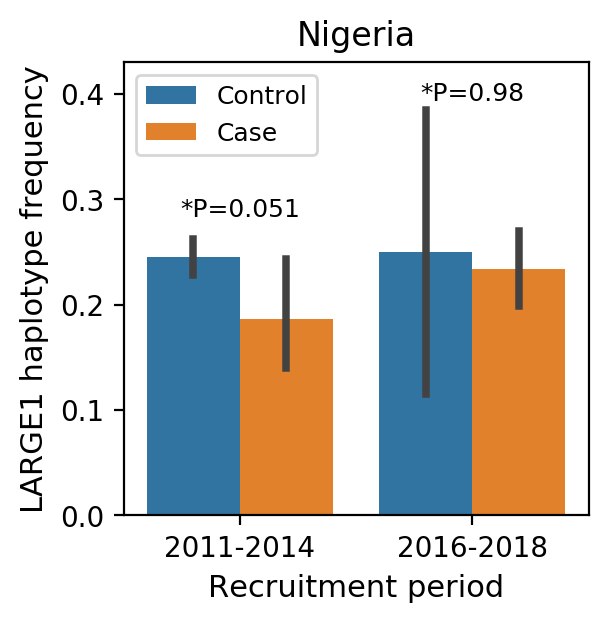

In [96]:
hap = pd.read_csv('../../data/tmp/GWAS/results_20220311/MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl/rel/../LARGEHaplotype_dosage.tsv', sep='\t').T
hap = hap[0].iloc[3:]

hap_pheno = main_phenotype_data.loc[hap.index, :]

hap_pheno['hap'] = hap
hap_pheno['hap_for_mean'] = hap / 2
hap_pheno['Case/Control'] = hap_pheno['MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControl'].replace({0:'Control', 1:'Case'})
hap_pheno['Epoch'] = hap_pheno['Epoch_Bin'].replace({0:'2011-2014', 1:'2016-2018'})

(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)
sns.barplot(x='Epoch', hue='Case/Control', y='hap_for_mean', data=hap_pheno,
                 order=['2011-2014', '2016-2018'], hue_order=['Control', 'Case'], ax=ax)
ax.set_ylim([0,.43])
ax.legend(loc='upper left', fontsize=9)
ax.set_ylabel('LARGE1 haplotype frequency', fontsize=11)
ax.set_xlabel('Recruitment period', fontsize=11)
ax.text(0, .29, '*P=0.051', ha='center', va='center', fontsize=9)
ax.text(1, .4, '*P=0.98', ha='center', va='center', fontsize=9)
ax.set_title('Nigeria')




plt.savefig('../../figures/LARGE_AF_NG_CaseControl_AndEpoch.pdf', bbox_inches='tight')

In [ ]:
hap = pd.read_csv('../../data/tmp/GWAS/results_20220311/MergeEpoch_SL_AgORSeqPos_Vs_PopControl/rel/../LARGEHaplotype_dosage.tsv', sep='\t').T
hap = hap[0].iloc[3:]

hap_pheno = main_phenotype_data.loc[hap.index, :]

hap_pheno['hap'] = hap
hap_pheno['hap_for_mean'] = hap / 2
hap_pheno['Case/Control'] = hap_pheno['MergeEpoch_SL_AgORSeqPos_Vs_PopControl'].replace({0:'Control', 1:'Case'})
hap_pheno['Epoch'] = hap_pheno['Epoch_Bin'].replace({0:'2011-2014', 1:'2016-2018'})

(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)
sns.barplot(x='Epoch', hue='Case/Control', y='hap_for_mean', data=hap_pheno,
                 order=['2011-2014', '2016-2018'], hue_order=['Control', 'Case'], ax=ax)
ax.set_ylim([0,.37])
ax.legend(loc='upper left', fontsize=9)
ax.set_ylabel('LARGE1 haplotype frequency', fontsize=11)
ax.set_xlabel('Recruitment period', fontsize=11)
ax.text(0, .2, '*P=0.11', ha='center', va='center', fontsize=9)
#ax.text(1, .39, '*P=0.98', ha='center', va='center', fontsize=9)
ax.set_title('Sierra Leone')




plt.savefig('../../figures/LARGE_AF_SL_CaseControl_AndEpoch.pdf', bbox_inches='tight')

In [64]:
p = 'MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControlQpcrNegX2' 
cases = ['Post2016_NG_LASV_ExactLVMatchqPCR2xPosOrSeqPos', 'Pre2016_NG_LASV_qPCR1xPos', 'Pre2016_NG_LASV_SeqPos'] 

#all the cases to be merged: Nigerians across batches who are determined to be positive by qPCR or sequencing
controls = ['Pre2016_NG_LASV_PopControl', 'Post2016_NG_LASV_PopControl']
# all the controls to be merged: Nigerians across batches serving as population controls, and qPCR- samples
main_phenotype_data[p] = -1 #null
for c in cases:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 1 #1 for cases
for c in controls:
    main_phenotype_data.loc[groups.index[groups[c]], p] = 0 #1 for controls   

c = 'Post2016_NG_LASV_qPCR2xNeg'
main_phenotype_data.loc[groups.index[groups[c]], p] = 2
    
    
print(p)
print(main_phenotype_data[p].value_counts())

MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControlQpcrNegX2
-1    3047
 0    1187
 1     411
 2     269
Name: MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControlQpcrNegX2, dtype: int64


/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [86]:
hapcall.index = hapcall['Sample']
hapcall.head()

,Sample,IDV_KMeans_Clustering,Country,Array,Batch,Epoch,CollectionEpoch,Age,SampleType,sex
Sample,,,,,,,,,,
Fall2013_SM-29811,Fall2013_SM-29811,1,NG,Omni_25M_A,Fall2013,Pre2016,Pre2016,36.0,Pre2016ControlNG,1
Fall2013_SM-29812,Fall2013_SM-29812,0,NG,Omni_25M_A,Fall2013,Pre2016,Pre2016,29.0,Pre2016ControlNG,1
Fall2013_SM-29813,Fall2013_SM-29813,1,NG,Omni_25M_A,Fall2013,Pre2016,Pre2016,31.0,Pre2016ControlNG,1
Fall2013_SM-29817,Fall2013_SM-29817,2,NG,Omni_25M_A,Fall2013,Pre2016,Pre2016,43.0,Pre2016ControlNG,1
Fall2013_SM-2981D,Fall2013_SM-2981D,0,NG,Omni_25M_A,Fall2013,Pre2016,Pre2016,31.0,Pre2016ControlNG,2


Text(0.5, 1.0, 'Nigeria')

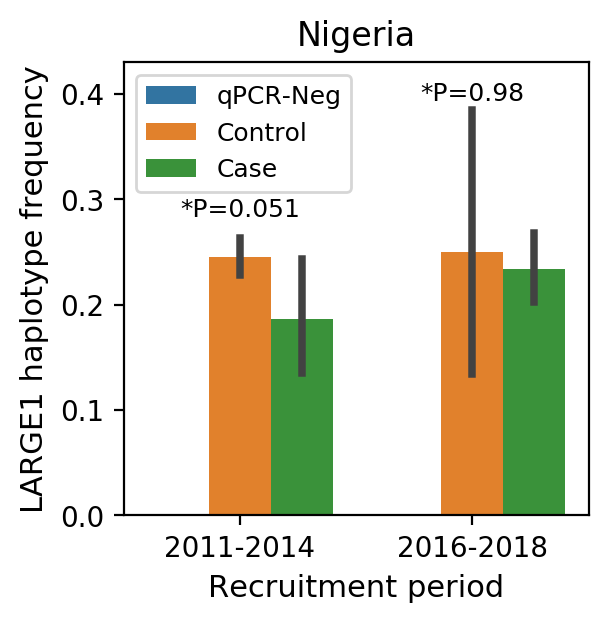

In [88]:
p = 'MergeEpoch_NG_ExactLVMatchqPCR2xPosOrSeqPos_Vs_PopControlQpcrNegX2'
hap = hapcall.loc[main_phenotype_data.index[main_phenotype_data[p]!=-1], 'IDV_KMeans_Clustering']

hap_pheno = main_phenotype_data.loc[hap.index, :]

hap_pheno['hap'] = hap
hap_pheno['hap_for_mean'] = hap / 2
hap_pheno['Case/Control'] = hap_pheno[p].replace({0:'Control', 1:'Case', 2:'qPCR-Neg'})
hap_pheno['Epoch'] = hap_pheno['Epoch_Bin'].replace({0:'2011-2014', 1:'2016-2018'})

(fig,ax) = plt.subplots(1,1, figsize=(3,3), dpi=200)
sns.barplot(x='Epoch', hue='Case/Control', y='hap_for_mean', data=hap_pheno,
                 order=['2011-2014', '2016-2018'], hue_order=['qPCR-Neg', 'Control', 'Case'], ax=ax)
ax.set_ylim([0,.43])
ax.legend(loc='upper left', fontsize=9)
ax.set_ylabel('LARGE1 haplotype frequency', fontsize=11)
ax.set_xlabel('Recruitment period', fontsize=11)
ax.text(0, .29, '*P=0.051', ha='center', va='center', fontsize=9)
ax.text(1, .4, '*P=0.98', ha='center', va='center', fontsize=9)
ax.set_title('Nigeria')




#plt.savefig('../../figures/LARGE_AF_NG_CaseControl_AndEpoch.pdf')
